In [1]:
# 📦 BLOQUE 1: Importación de librerías y carga de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def cargar_datos(ruta_archivo):
    """
    Carga el dataset desde la ruta especificada y verifica su correcta carga
    
    Parámetros:
        ruta_archivo (str): Ruta completa del archivo CSV
        
    Retorna:
        pd.DataFrame: Dataset cargado
    """
    if not os.path.exists(ruta_archivo):
        raise FileNotFoundError(f"El archivo no existe en: {ruta_archivo}")
    
    df = pd.read_csv(ruta_archivo)
    print(f"✅ Dataset cargado correctamente. Dimensiones: {df.shape}")
    return df

# Configuración inicial
RUTA_DATASET = r"C:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\processed\features_dataset.csv"

# Cargar datos
df_features = cargar_datos(RUTA_DATASET)

✅ Dataset cargado correctamente. Dimensiones: (873, 7)


✅ Visualizando anomalías con etiquetas legibles...
📋 Resumen de anomalías por tipo:

Clase_Label
10 - Communication Protocol Violation    354
23 - Reaction Wheel Saturation            83
12 - Attitude Control Oscillation         56
14 - CPU Utilization Spike                47
28 - Onboard Storage Threshold            46
5 - Power Supply Fluctuation              42
9 - Payload Decoding Failure              38
22 - Solar Array Underperformance         37
26 - Magnetometer Interference            23
11 - Radiation Exposure Alert             18
7 - Configuration Drift                   11
2 - Network Latency Spike                 11
18 - Frame Synchronization Loss           10
29 - Operating System Kernel Panic        10
8 - Sensor Calibration Error               9
13 - Power Bus Overload                    8
25 - Gyroscope Bias Shift                  8
0 - Software Integrity Failure             8
6 - Thermal Overload                       7
4 - Database Connection Timeout            6
1 -

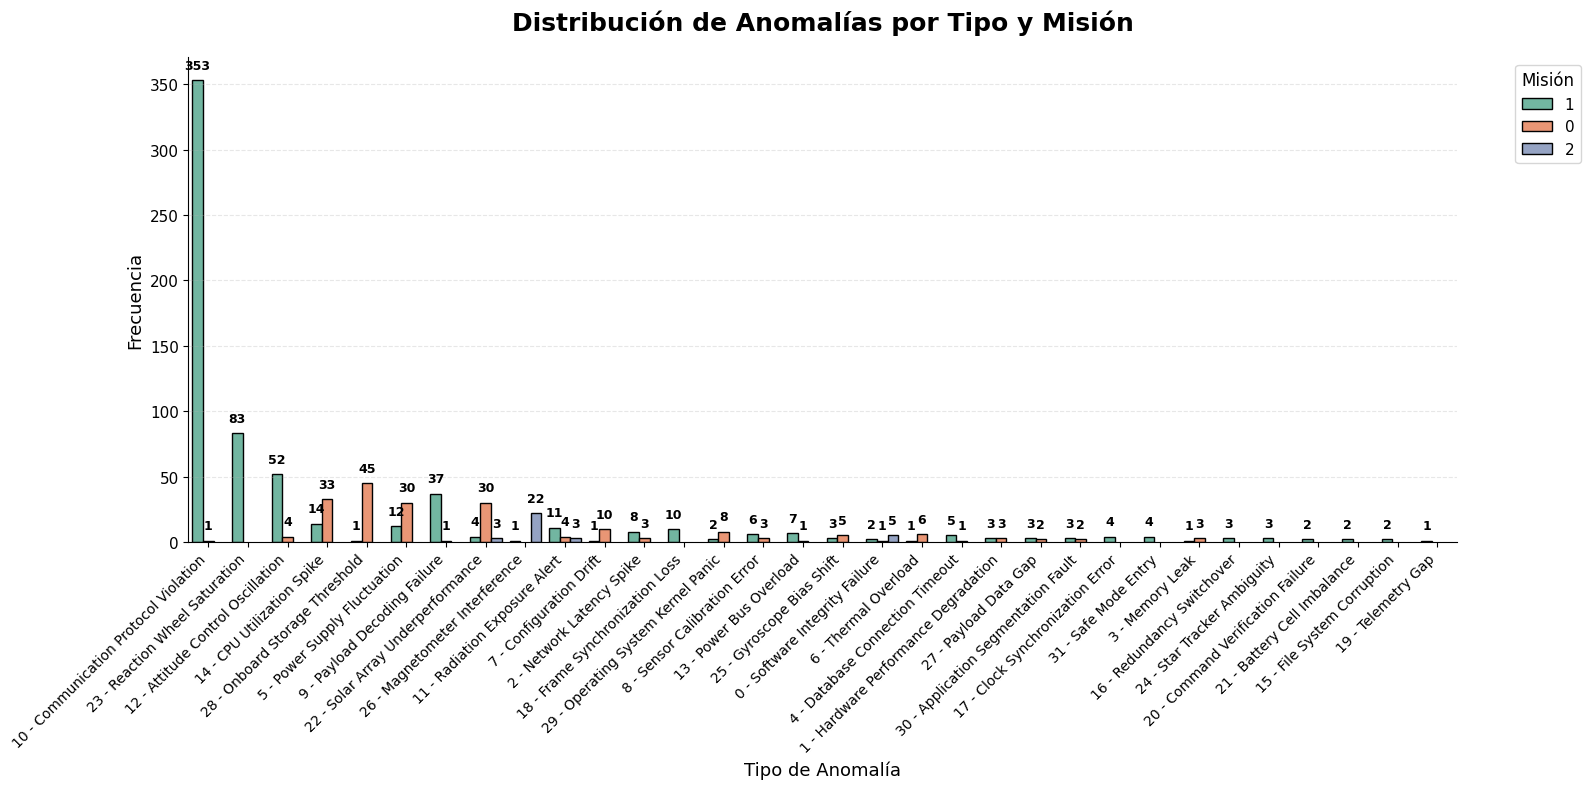

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.ion()

# Diccionario de nombres de clases
class_names = {
    0: "Software Integrity Failure", 1: "Hardware Performance Degradation",
    2: "Network Latency Spike", 3: "Memory Leak", 4: "Database Connection Timeout",
    5: "Power Supply Fluctuation", 6: "Thermal Overload", 7: "Configuration Drift",
    8: "Sensor Calibration Error", 9: "Payload Decoding Failure", 10: "Communication Protocol Violation",
    11: "Radiation Exposure Alert", 12: "Attitude Control Oscillation", 13: "Power Bus Overload",
    14: "CPU Utilization Spike", 15: "File System Corruption", 16: "Redundancy Switchover",
    17: "Clock Synchronization Error", 18: "Frame Synchronization Loss", 19: "Telemetry Gap",
    20: "Command Verification Failure", 21: "Battery Cell Imbalance", 22: "Solar Array Underperformance",
    23: "Reaction Wheel Saturation", 24: "Star Tracker Ambiguity", 25: "Gyroscope Bias Shift",
    26: "Magnetometer Interference", 27: "Payload Data Gap", 28: "Onboard Storage Threshold",
    29: "Operating System Kernel Panic", 30: "Application Segmentation Fault", 31: "Safe Mode Entry",
    32: "Thermal Control Instability", 33: "Propellant Pressure Drop", 34: "Orbit Determination Error",
    35: "Radio Signal Interference", 36: "Antenna Pointing Error", 37: "Data Compression Failure",
    38: "Encryption Handshake Failure", 39: "Memory Bit Flip", 40: "Latch-Up Event",
    41: "Single Event Upset", 42: "Bus Voltage Sag", 43: "Current Overload",
    44: "Watchdog Timer Reset", 45: "Firmware Checksum Error", 46: "EEPROM Write Failure",
    47: "Optical Surface Degradation", 48: "Mechanical Stiction", 49: "Lubricant Outgassing",
    50: "Structural Resonance", 51: "Micro-Meteoroid Impact", 52: "Orbital Debris Collision"
}

def visualizar_anomalias(df):
    """
    Visualiza la distribución de anomalías por tipo y misión, usando nombres de clase legibles.
    """
    try:
        if df.empty:
            raise ValueError("❌ El DataFrame está vacío.")
        if 'Class' not in df.columns or 'mission' not in df.columns:
            raise ValueError("❌ Se requieren las columnas 'Class' y 'mission'.")

        # Crear columna con nombre legible si no existe
        df['Clase_Label'] = df['Class'].apply(lambda c: f"{c} - {class_names.get(c, 'Desconocida')}")

        # Tabla resumen
        resumen = df.groupby('Clase_Label').size().sort_values(ascending=False)
        print("📋 Resumen de anomalías por tipo:\n")
        print(resumen.to_string())
        print("\n")

        # Gráfico
        class_order = resumen.index.tolist()
        mission_order = df['mission'].value_counts().index

        plt.figure(figsize=(16, 8))
        ax = sns.countplot(
            data=df,
            x='Clase_Label',
            hue='mission',
            order=class_order,
            hue_order=mission_order,
            palette='Set2',
            edgecolor='black'
        )

        plt.title("Distribución de Anomalías por Tipo y Misión", fontsize=18, weight='bold', pad=20)
        plt.xlabel("Tipo de Anomalía", fontsize=13)
        plt.ylabel("Frecuencia", fontsize=13)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.yticks(fontsize=11)
        plt.grid(axis='y', linestyle='--', alpha=0.3)
        sns.despine()

        plt.legend(title="Misión", title_fontsize=12, fontsize=11, bbox_to_anchor=(1.04, 1), loc="upper left")

        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='bottom', fontsize=9, weight='bold', xytext=(0, 6),
                            textcoords='offset points')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"⚠️ Error en la visualización: {e}")


# 🔁 Autoejecución si el DataFrame existe
try:
    if 'df_features' in globals() and isinstance(df_features, pd.DataFrame):
        print("✅ Visualizando anomalías con etiquetas legibles...")
        visualizar_anomalias(df_features)
    else:
        print("⚠️ No se encontró el DataFrame 'df_features'. Cárgalo antes de ejecutar.")
except Exception as e:
    print(f"⚠️ Error en autoejecución: {e}")


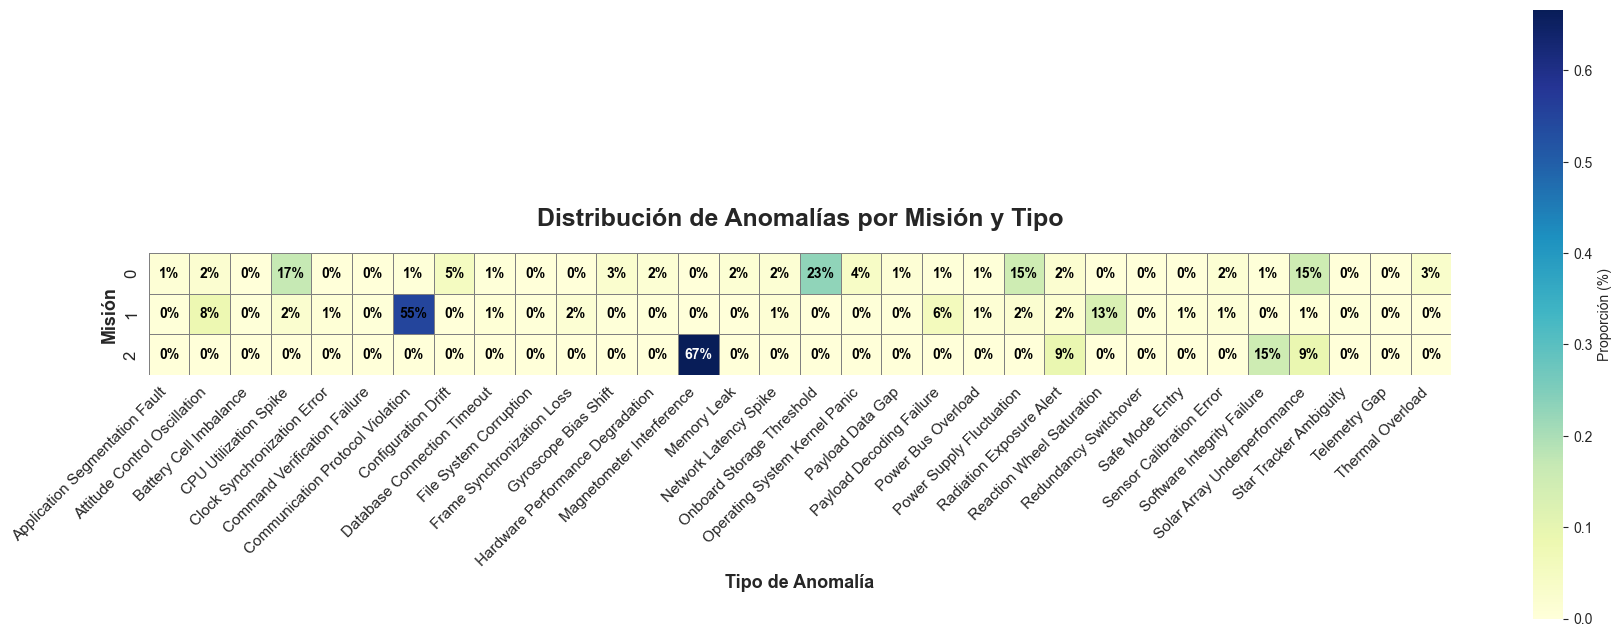

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Mapeo de clases (asegúrate que class_names esté definido)
df_temp = X.copy()
df_temp["ClassName"] = df_temp["Class"].map(class_names)

# Tabla de proporciones
tabla_pct = pd.crosstab(df_temp["mission"], df_temp["ClassName"], normalize='index')

# Paleta clara con contraste
cmap = sns.color_palette("YlGnBu", as_cmap=True)

# Crear figura
plt.figure(figsize=(18, 9))
sns.set_style("whitegrid")

# Dibujar heatmap
ax = sns.heatmap(
    tabla_pct,
    annot=True,
    fmt=".0%",
    cmap=cmap,
    linewidths=0.4,
    linecolor='gray',
    square=True,
    annot_kws={"size": 10, "weight": "bold"},
    cbar_kws={"shrink": 0.7, "label": "Proporción (%)"}
)

# Títulos y ejes
plt.title("Distribución de Anomalías por Misión y Tipo", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Tipo de Anomalía", fontsize=13, fontweight='semibold')
plt.ylabel("Misión", fontsize=13, fontweight='semibold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

# Contraste automático para cada número (negro o blanco según fondo)
for text in ax.texts:
    try:
        val = float(text.get_text().strip('%')) / 100
        # Valor RGB de fondo
        color_val = cmap(val)
        brightness = sum(color_val[:3]) / 3
        text.set_color("white" if brightness < 0.5 else "black")
    except:
        text.set_color("black")

plt.tight_layout()
plt.show()
